In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv('ey_data.csv')

df.iloc[:, 3:] = df.iloc[:, 3:].replace({',': '', ' ': ''}, regex=True).astype(int)
df.drop(['Company ID', 'Company name'], axis=1, inplace=True)

In [3]:
print(df.columns)
print(df.shape)

df.head()

Index(['Industry', 'Number of employees 2023', 'Number of employees 2024',
       'Number of employees 2025', '2023 wages', '2024 wages', '2025 wages',
       '2023 number of claims', '2024 number of claims',
       '2025 number of claims', '2023 medical costs', '2024 medical costs',
       '2025 medical costs'],
      dtype='object')
(202, 13)


,Industry,Number of employees 2023,Number of employees 2024,Number of employees 2025,2023 wages,2024 wages,2025 wages,2023 number of claims,2024 number of claims,2025 number of claims,2023 medical costs,2024 medical costs,2025 medical costs
0,Accommodation and Hospitality,607,1222,3442,51681173,96400212,260009371,4,8,33,27885,47417,154488
1,Government Administration,861,1413,3074,87474722,170496310,343656301,3,6,15,52656,87897,185723
2,Fishing and Agriculture,532,1478,2125,51009504,147938535,237962664,11,23,40,280635,615168,1089305
3,Education,247,648,1638,25502092,96503303,213916588,2,4,10,13326,35746,88579
4,Fishing and Agriculture,231,403,719,18951940,33588906,65421198,4,5,9,121827,202365,319094


In [4]:
for col in df.columns:
    print(col, type(df[col][1]))

Industry <class 'str'>
Number of employees 2023 <class 'int'>
Number of employees 2024 <class 'int'>
Number of employees 2025 <class 'int'>
2023 wages <class 'int'>
2024 wages <class 'int'>
2025 wages <class 'int'>
2023 number of claims <class 'numpy.int64'>
2024 number of claims <class 'numpy.int64'>
2025 number of claims <class 'numpy.int64'>
2023 medical costs <class 'int'>
2024 medical costs <class 'int'>
2025 medical costs <class 'int'>


To estimate claim sizes
$$
\frac{4}{52} \cdot 0.7 \cdot 0.75 \cdot \text{Average salary for the year} + \text{Average medical Costs per claim}
$$

In [5]:
df['2023_avg_salary'] = df['2023 wages'] / df['Number of employees 2023']
df['2024_avg_salary'] = df['2024 wages'] / df['Number of employees 2024']
df['2025_avg_salary'] = df['2025 wages'] / df['Number of employees 2025']

df['2023_avg_medical_cost'] = df['2023 medical costs'] / df['2023 number of claims']
df['2024_avg_medical_cost'] = df['2024 medical costs'] / df['2024 number of claims']
df['2025_avg_medical_cost'] = df['2025 medical costs'] / df['2025 number of claims']

df['2023_expected_claim'] = 4/52 * 0.7 * 0.75 * df['2023_avg_salary'] + df['2023_avg_medical_cost']
df['2024_expected_claim'] = 4/52 * 0.7 * 0.75 * df['2024_avg_salary'] + df['2024_avg_medical_cost']
df['2025_expected_claim'] = 4/52 * 0.7 * 0.75 * df['2025_avg_salary'] + df['2025_avg_medical_cost']

In [7]:
u, c = np.unique(df['Industry'], return_counts=True)

for u, c in zip(u,c):
    print(u, c)

Accommodation and Hospitality 45
Education 22
Fishing and Agriculture 51
Government Administration 11
Health and Community 36
Property and Business Service 37


In [8]:
df.head()

,Industry,Number of employees 2023,Number of employees 2024,Number of employees 2025,2023 wages,2024 wages,2025 wages,2023 number of claims,2024 number of claims,2025 number of claims,...,2025 medical costs,2023_avg_salary,2024_avg_salary,2025_avg_salary,2023_avg_medical_cost,2024_avg_medical_cost,2025_avg_medical_cost,2023_expected_claim,2024_expected_claim,2025_expected_claim
0,Accommodation and Hospitality,607,1222,3442,51681173,96400212,260009371,4,8,33,...,154488,85141.965404,78887.243863,75540.200755,6971.25,5927.125,4681.454545,10409.675526,9112.956002,7732.116499
1,Government Administration,861,1413,3074,87474722,170496310,343656301,3,6,15,...,185723,101596.657375,120662.639774,111794.502602,17552.0,14649.5,12381.533333,21654.941932,19522.414299,16896.311323
2,Fishing and Agriculture,532,1478,2125,51009504,147938535,237962664,11,23,40,...,1089305,95882.526316,100093.731394,111982.430118,25512.272727,26746.434783,27232.625,29384.451675,30788.681627,31754.99237
3,Education,247,648,1638,25502092,96503303,213916588,2,4,10,...,88579,103247.336032,148924.850309,130596.20757,6663.0,8936.5,8857.9,10832.603955,14950.772801,14131.977613
4,Fishing and Agriculture,231,403,719,18951940,33588906,65421198,4,5,9,...,319094,82043.030303,83347.16129,90989.148818,30456.75,40473.0,35454.888889,33770.026224,43838.943052,39129.450668


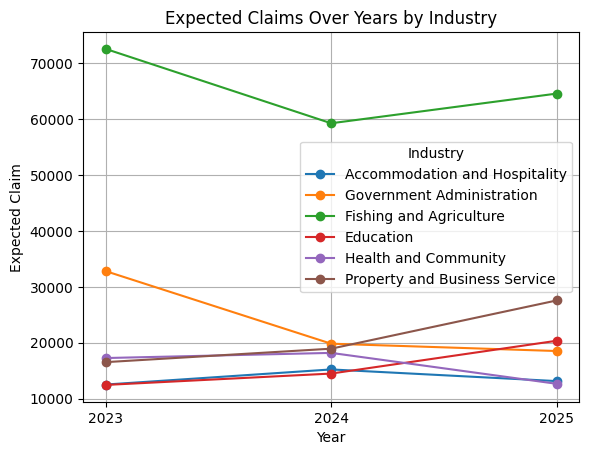

In [9]:

industries = df['Industry'].unique()

for industry in industries:
    subset = df[df['Industry'] == industry]
    
    # Transpose years and claims to plot
    years = ['2023', '2024', '2025']
    claims = subset[['2023_expected_claim', '2024_expected_claim', '2025_expected_claim']].mean()
    
    plt.plot(years, claims, marker='o', label=industry)  # Line plot with markers

# Labels and title
plt.xlabel('Year')
plt.ylabel('Expected Claim')
plt.title('Expected Claims Over Years by Industry')
plt.legend(title='Industry')
plt.grid(True)
plt.show()

/tmp/ipykernel_87824/4142150660.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_colors = plt.cm.get_cmap("tab10", len(industries))  # Using 'tab10' colormap


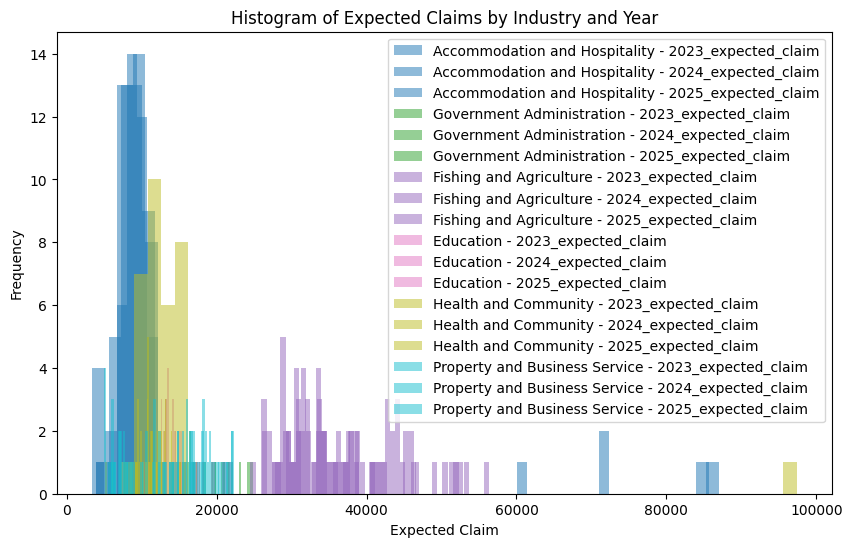

In [20]:
df_filtered = df[
    (df['2023_expected_claim'] <= 100_000) & 
    (df['2024_expected_claim'] <= 100_000) & 
    (df['2025_expected_claim'] <= 100_000)
]
plt.figure(figsize=(10, 6))

# Define base colors for industries
base_colors = plt.cm.get_cmap("tab10", len(industries))  # Using 'tab10' colormap

# Define a list of years
years = ["2023_expected_claim", "2024_expected_claim", "2025_expected_claim"]

for i, industry in enumerate(industries):
    subset = df_filtered[df_filtered['Industry'] == industry]  # Filter data by industry
    base_color = base_colors(i)  # Get base color for the industry

    # Generate different shades for each year
    for j, year in enumerate(years):
        # Modify the alpha channel slightly to differentiate shades
        color_variant = list(base_color)
        color_variant[3] = 0.3 + j * 0.2  # Vary transparency (alpha)

        plt.hist(subset[year], bins=50, alpha=0.5, color=color_variant, label=f"{industry} - {year}")

plt.xlabel('Expected Claim')
plt.ylabel('Frequency')
plt.title('Histogram of Expected Claims by Industry and Year')
plt.legend()
plt.show()


# Precursor

From here, we assume that each risk (each industry in our aggregate portfolio) has iid claims for each year.

Rationale:
- there are only 3 observations for each risk. Assuming some pattern or growth factors in our dataset has significant risk of overfitting to noise that is inherent in annual claims
- for sake of inference, observations and conclusions we can make from assuming iid are a lot easier to interpret as well as understand. this is as opposed to "it increased by +2% and then -2% so the next change must be 0%"

Remark:
- although the first point from above stated it is hard to find some pattern from a lack of data, this applies to this assumption - it is hard to show that claims are indeed iid. however, visually inspecting our histogram plot of the above, we do see some patterns emerge that could belong to a distribution, and the years dont stray too far away from this distribution looking thing...


We are interested in calculating the breakeven premium. That is, (for the net premium), our premium revenue must equal our expected claims for the year. Hence, using the above assumption, our best estimate for the expected claims for the year is...

In [11]:
sum_2023 = np.sum(df['2023_expected_claim'])
sum_2024 = np.sum(df['2024_expected_claim'])
sum_2025 = np.sum(df['2025_expected_claim'])

expected_total_claims = np.mean([sum_2023, sum_2024, sum_2025])

print(expected_total_claims)

5913889.602183369


# A naive within-industry sample mean approach

We assume that each industry is independent to each other, and so the premium for each industry is the mean of the claims for all available years

In [21]:
T = 3
industry_df = df.groupby("Industry", as_index=False).sum()

naive_prems = []
for _, row in industry_df.iterrows():
    prem = np.mean([
        row['2023_expected_claim'],
        row['2024_expected_claim'],
        row['2025_expected_claim']
    ])
    naive_prems.append(prem)

for industry, prem in zip(industry_df['Industry'], naive_prems):
    print(f'Industry: {industry} - Premium: {prem}')

print(f'\nSum of all premiums: {np.sum(naive_prems)}')

means_lookup = dict(zip(industry_df['Industry'].values, naive_prems))

Industry: Accommodation and Hospitality - Premium: 612914.7662390828
Industry: Education - Premium: 346669.9008454503
Industry: Fishing and Agriculture - Premium: 3339267.845134217
Industry: Government Administration - Premium: 260867.46541068368
Industry: Health and Community - Premium: 576998.4118025507
Industry: Property and Business Service - Premium: 777171.212751384

Sum of all premiums: 5913889.602183368


# A naive Buhlmann Model

The issue of the above is that we are assuming each risk (industry) is completely independent of each other and hence no further information about one risk can be gained by considering others. The main downside of this is that we're potentially massively overfitting to the 3 datapoints we have for each risk and discarding information that could help us set better premiums.

To alleviate this, we consider a (naive) Buhlmann model, where we each $z$ is estimated as
$$
z = \frac{T}{T + \frac{s^2}{a}}.
$$

To estimate each parameter,
$$
\begin{align*}
\hat{m} &= \frac{1}{J} \sum_{j=1}^J \bar{X}_{j} \\
\hat{s}^2 &= \frac{1}{J} \sum_{j=1}^{J} \sum_{t=1}^{T} \frac{(X_{j,t}-\bar{X}_{j})^{2}}{T-1} \\
\hat{a} &= \max \left[ \frac{\sum_{j=1}^{J}(\bar{X}_{j} - \bar{X})^{2}}{J-1} - \frac{1}{T} \hat{s}^{2} ; 0\right]
\end{align*}
$$


In [13]:
means = []
for _, row in industry_df.iterrows():
    X_j = np.mean([
        row['2023_expected_claim'],
        row['2024_expected_claim'],
        row['2025_expected_claim']
    ])
    means.append(X_j)

m = np.mean(means)

# s^2
variances = []
for _, row in industry_df.iterrows():
    obs = [
        row['2023_expected_claim'],
        row['2024_expected_claim'],
        row['2025_expected_claim']
    ]
    var = np.var(obs, ddof=1)
    variances.append(var)

s_2 = np.mean(variances)

# a
a = np.max(np.var(means, ddof=1) - 1/T * s_2, 0)

z = T/(T + s_2/a)

print(f"""
m = {m}
s^2 = {s_2}
a = {a}

z = {z}\n
""")

# actual premium calculation
# note that the naive prems are the within risk sample mean
prems1 = []
for mean in naive_prems:
    prems1.append(z * mean + (1-z) * m)

for industry, prem in zip(industry_df['Industry'], prems1):
    print(f'Industry: {industry} - Premium: {prem}')

print(f'\nSum of all premiums: {np.sum(prems1)}')



m = 985648.2670305613
s^2 = 32323373733.37794
a = 1353728208135.523

z = 0.9921037472632115


Industry: Accommodation and Hospitality - Premium: 615857.9641648002
Industry: Education - Premium: 351715.4355181881
Industry: Fishing and Agriculture - Premium: 3320683.070099257
Industry: Government Administration - Premium: 266590.5177990464
Industry: Health and Community - Premium: 580225.2143402831
Industry: Property and Business Service - Premium: 778817.4002617935

Sum of all premiums: 5913889.602183368


Note that $z$ from above is just barely under $1$. This is because an outlier industry in our dataset is massively inflating our heterogeneity estimate, causing the model to place nearly all weight onto the sample mean. 

To address this, we redo our calculations with the removal of this industry. It is fair to say that the claims for the Fishing and Agriculture industry are dissimilar to other industries, with significant outliers and a much higher sample mean.

# An improved Buhlmann model

To address this, we redo our calculations with the removal of this industry. It is fair to say that the claims for the Fishing and Agriculture industry are dissimilar to other industries, with significant outliers and a much higher sample mean.

In [39]:
T = 3
industry_df = df.groupby("Industry", as_index=False).sum()

## EXCLUDE FISHING AND AGRICULTURE FROM CALCULATIONS
industry_df = industry_df.loc[industry_df["Industry"] != "Fishing and Agriculture"]

# calculate m
means = []
for _, row in industry_df.iterrows():
    X_j = np.mean([
        row['2023_expected_claim'],
        row['2024_expected_claim'],
        row['2025_expected_claim']
    ])
    means.append(X_j)

m = np.mean(means)

# s^2
variances = []
for _, row in industry_df.iterrows():
    obs = [
        row['2023_expected_claim'],
        row['2024_expected_claim'],
        row['2025_expected_claim']
    ]
    var = np.var(obs, ddof=1)
    variances.append(var)

s_2 = np.mean(variances)

# a
a = np.max(np.var(means, ddof=1) - 1/T * s_2, 0)

z = T/(T + s_2/a)

print(f"""
m = {m}
s^2 = {s_2}
a = {a}

z = {z}
""")


m = 514924.35140983027
s^2 = 15453855782.815868
a = 38619511767.52361

z = 0.8823122810034972



Looking at the above, note the significant change in our $a$ value (our estiamte of risk heterogeneity)

Actually calculating the premiums...

In [42]:
prems2 = {}
for industry in industry_df['Industry']:
    prem = z * means_lookup[industry] + (1-z) * m
    prems2[industry] = prem

prems2['Fishing and Agriculture'] = means_lookup['Fishing and Agriculture']

for industry, prem in zip(prems2.keys(), prems2.values()):
    print(f'Industry: {industry} - Premium: {prem}')

print(f'\nSum of all premiums: {sum(prems2.values())}')


Industry: Accommodation and Hospitality - Premium: 601382.4978343069
Industry: Education - Premium: 366471.383343382
Industry: Government Administration - Premium: 290766.8408192778
Industry: Health and Community - Premium: 569693.0572260802
Industry: Property and Business Service - Premium: 746307.9778261044
Industry: Fishing and Agriculture - Premium: 3339267.845134217

Sum of all premiums: 5913889.602183368
